# MNIST GAN 0.4

Experimenting with a combination of TTUR and one-sided label smoothing.

In [2]:
from google.colab import files

import mnist_example as mnist_ex
import gan
from importlib import reload
import numpy as np
from matplotlib import pyplot as plt

from tensorflow.keras.backend import clear_session

import pickle

In [3]:
mnist_ex.preprocess_real(save_only=True)
real_train, real_test = pickle.load(open("mnist_train_tuple.p", "rb"))
real_train.shape

(60000, 32, 32, 1)

In [4]:
reload(gan)

<module 'gan' from '/content/gan.py'>

In [5]:
clear_session()
model = gan.GAN(x_shape=real_train.shape[1:], kernal_size=5, 
                latent_dims=50, verbose=True, lr=(1e-4, 4e-4))

Model: "generator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 50)]              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               26112     
_________________________________________________________________
batch_normalization_4 (Batch (None, 512)               2048      
_________________________________________________________________
reshape (Reshape)            (None, 2, 2, 128)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 4, 4, 64)          204864    
_________________________________________________________________
batch_normalization_5 (Batch (None, 4, 4, 64)          256       
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 4, 4, 64)          0 

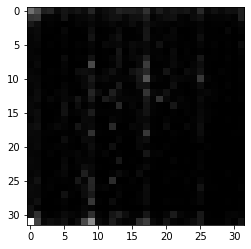

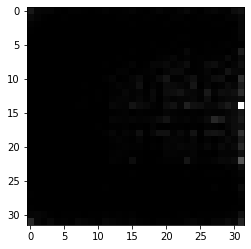

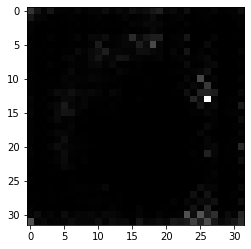

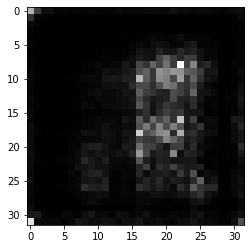

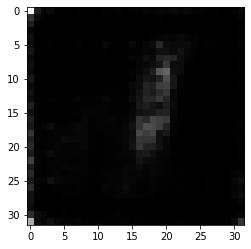

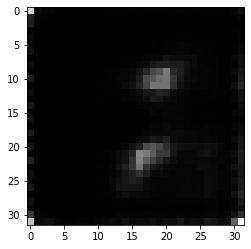

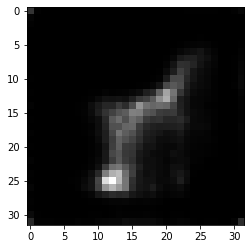

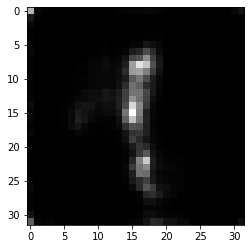

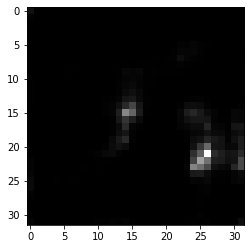

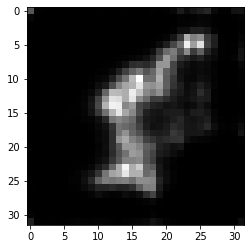

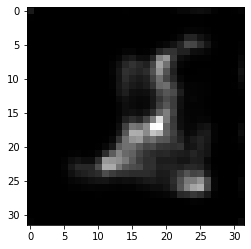

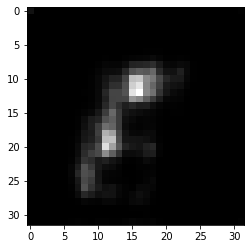

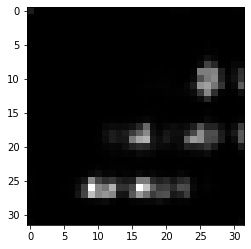

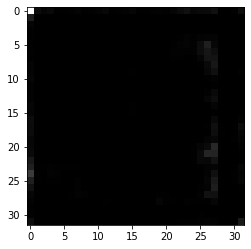

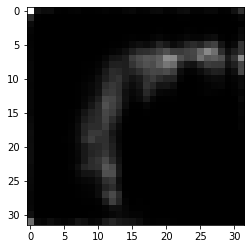

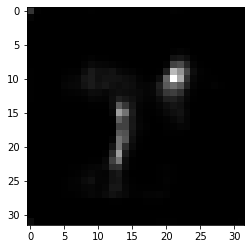

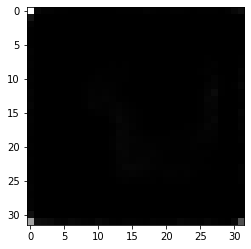

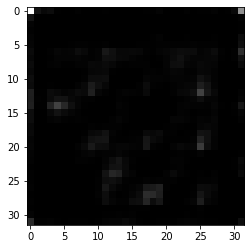

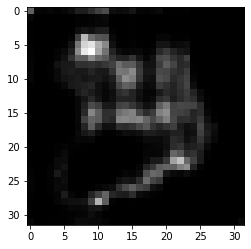

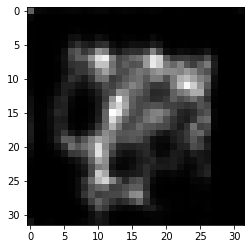

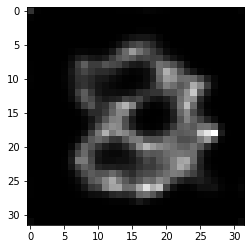

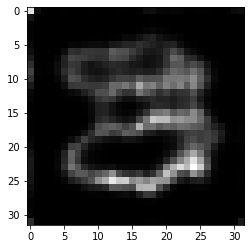

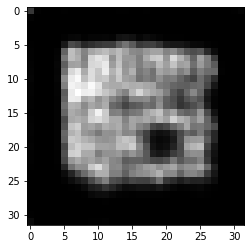

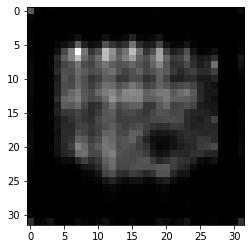

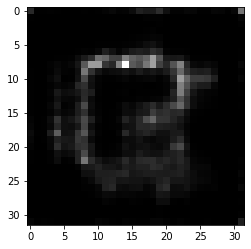

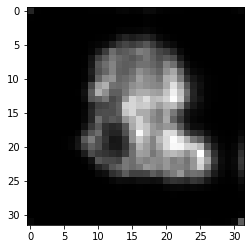

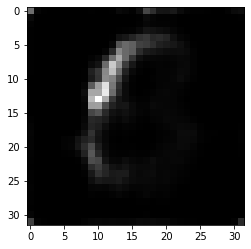

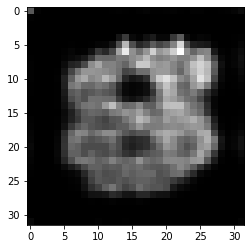

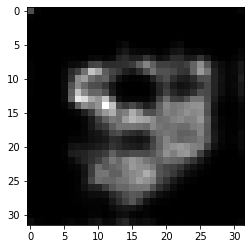

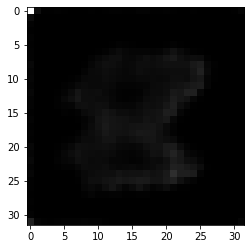

In [6]:
model.train(real_train, num_epochs=30, batch_size=30, labels=(0, 0.9))

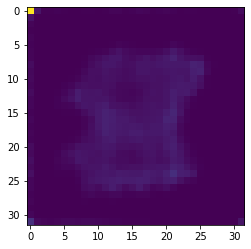

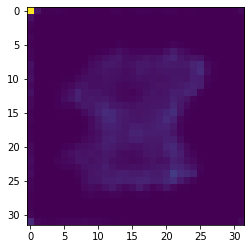

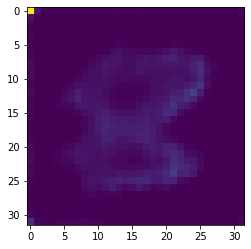

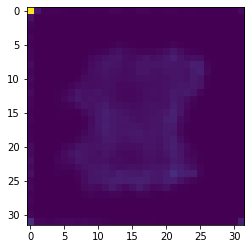

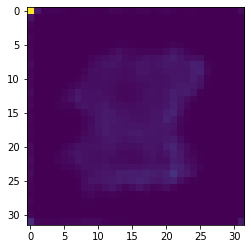

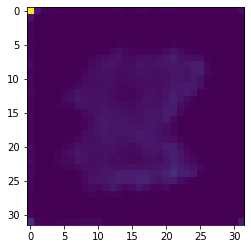

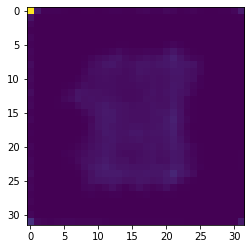

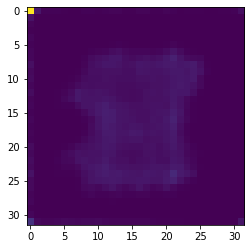

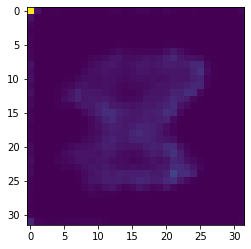

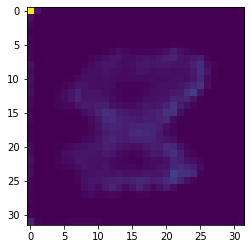

In [11]:
for _ in range(10):
  fake_img = model.generator.predict(np.random.randn(1, 50))
  plt.imshow(fake_img.reshape(32, 32))
  plt.show()

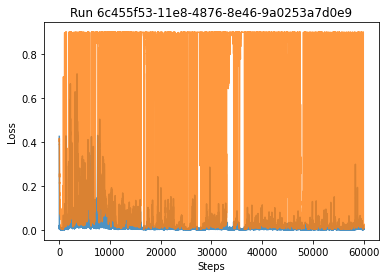

In [8]:
model.history.plot_loss()

On initial inspection, it does not seem that combining both TTUR and one-sided label smoothing has noticeably improved the quality of the generated images.

Once again, it is also clear that the generator again fails to capture the full entropy of the underlying distribution (single mode collapse). Here we can see that the generator overwhelmingly produces the '8-like' digits (8, 9, 0).

The next step would therefore be to attempt address this using minibatch discrimination and re-run this combination of hyperparameters.

In [12]:
!zip -r /content/temp_file.zip /content/Training_Runs
files.download("/content/temp_file.zip")

  adding: content/Training_Runs/ (stored 0%)
  adding: content/Training_Runs/6c455f53-11e8-4876-8e46-9a0253a7d0e9/ (stored 0%)
  adding: content/Training_Runs/6c455f53-11e8-4876-8e46-9a0253a7d0e9/img_epoch5.png (deflated 16%)
  adding: content/Training_Runs/6c455f53-11e8-4876-8e46-9a0253a7d0e9/img_epoch4.png (deflated 14%)
  adding: content/Training_Runs/6c455f53-11e8-4876-8e46-9a0253a7d0e9/img_epoch30.png (deflated 15%)
  adding: content/Training_Runs/6c455f53-11e8-4876-8e46-9a0253a7d0e9/img_epoch13.png (deflated 16%)
  adding: content/Training_Runs/6c455f53-11e8-4876-8e46-9a0253a7d0e9/img_epoch8.png (deflated 16%)
  adding: content/Training_Runs/6c455f53-11e8-4876-8e46-9a0253a7d0e9/img_epoch26.png (deflated 16%)
  adding: content/Training_Runs/6c455f53-11e8-4876-8e46-9a0253a7d0e9/img_epoch6.png (deflated 16%)
  adding: content/Training_Runs/6c455f53-11e8-4876-8e46-9a0253a7d0e9/img_epoch12.png (deflated 18%)
  adding: content/Training_Runs/6c455f53-11e8-4876-8e46-9a0253a7d0e9/img_epoc

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>